# Aplicação de métodos de aprendizado de máquina na detecção de câncer de mama
### Instalação de bibliotecas

In [ ]:
pip install ucimlrepo -q

Note: you may need to restart the kernel to use updated packages.


### Importação de bibliotecas

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

### Carregamento de dados

In [34]:
# buscando dataset 
breast_cancer_coimbra = fetch_ucirepo(id=451) 
  
# separando em variáveis preditoras (features) e alvo (target)
X = breast_cancer_coimbra.data.features 
y = breast_cancer_coimbra.data.targets 

print("Dados carregados com sucesso. Shape de X:", X.shape)
print("Distribuição da variável alvo (y):")
print(y.value_counts())

Dados carregados com sucesso. Shape de X: (116, 9)
Distribuição da variável alvo (y):
Classification
2                 64
1                 52
Name: count, dtype: int64


### Exploração de dados

In [ ]:
# metadados do dataset
print(breast_cancer_coimbra.metadata) 

{'uci_id': 451, 'name': 'Breast Cancer Coimbra', 'repository_url': 'https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra', 'data_url': 'https://archive.ics.uci.edu/static/public/451/data.csv', 'abstract': 'Clinical features were observed or measured for 64 patients with breast cancer and 52 healthy controls. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 116, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Classification'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C52P59', 'creators': ['Miguel Patrcio', 'Jos Pereira', 'Joana Crisstomo', 'Paulo Matafome', 'Raquel Seia', 'Francisco Caramelo'], 'intro_paper': {'ID': 431, 'type': 'NATIVE', 'title': 'Using Resistin, glucose, age and BMI to predict the presence of breast cancer', 'authors': 'M.

In [10]:
# detalhes de cada variável do dataset
print(breast_cancer_coimbra.variables)

             name     role        type demographic  \
0             Age  Feature     Integer         Age   
1             BMI  Feature  Continuous        None   
2         Glucose  Feature     Integer        None   
3         Insulin  Feature  Continuous        None   
4            HOMA  Feature  Continuous        None   
5          Leptin  Feature  Continuous        None   
6     Adiponectin  Feature  Continuous        None   
7        Resistin  Feature  Continuous        None   
8           MCP.1  Feature  Continuous        None   
9  Classification   Target     Integer        None   

                      description  units missing_values  
0                            None   year             no  
1                            None  kg/m2             no  
2                            None  mg/dL             no  
3                            None  µU/mL             no  
4                            None   None             no  
5                            None  ng/mL             no  

In [35]:
# Estatísticas Descritivas 
print(X.describe())

              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  
count   116.000000  116.000000   116.000000  
mean     10.180874   14.725966   534.647000  
std       6.843341   12.390646   345.912663  
min       1.656020    3.210000    45.843000  
25%       5.474283    6.881763   269.978

In [36]:
# Contagem de Valores Ausentes
print(X.isnull().sum().to_frame(name='Missing Count'))

             Missing Count
Age                      0
BMI                      0
Glucose                  0
Insulin                  0
HOMA                     0
Leptin                   0
Adiponectin              0
Resistin                 0
MCP.1                    0


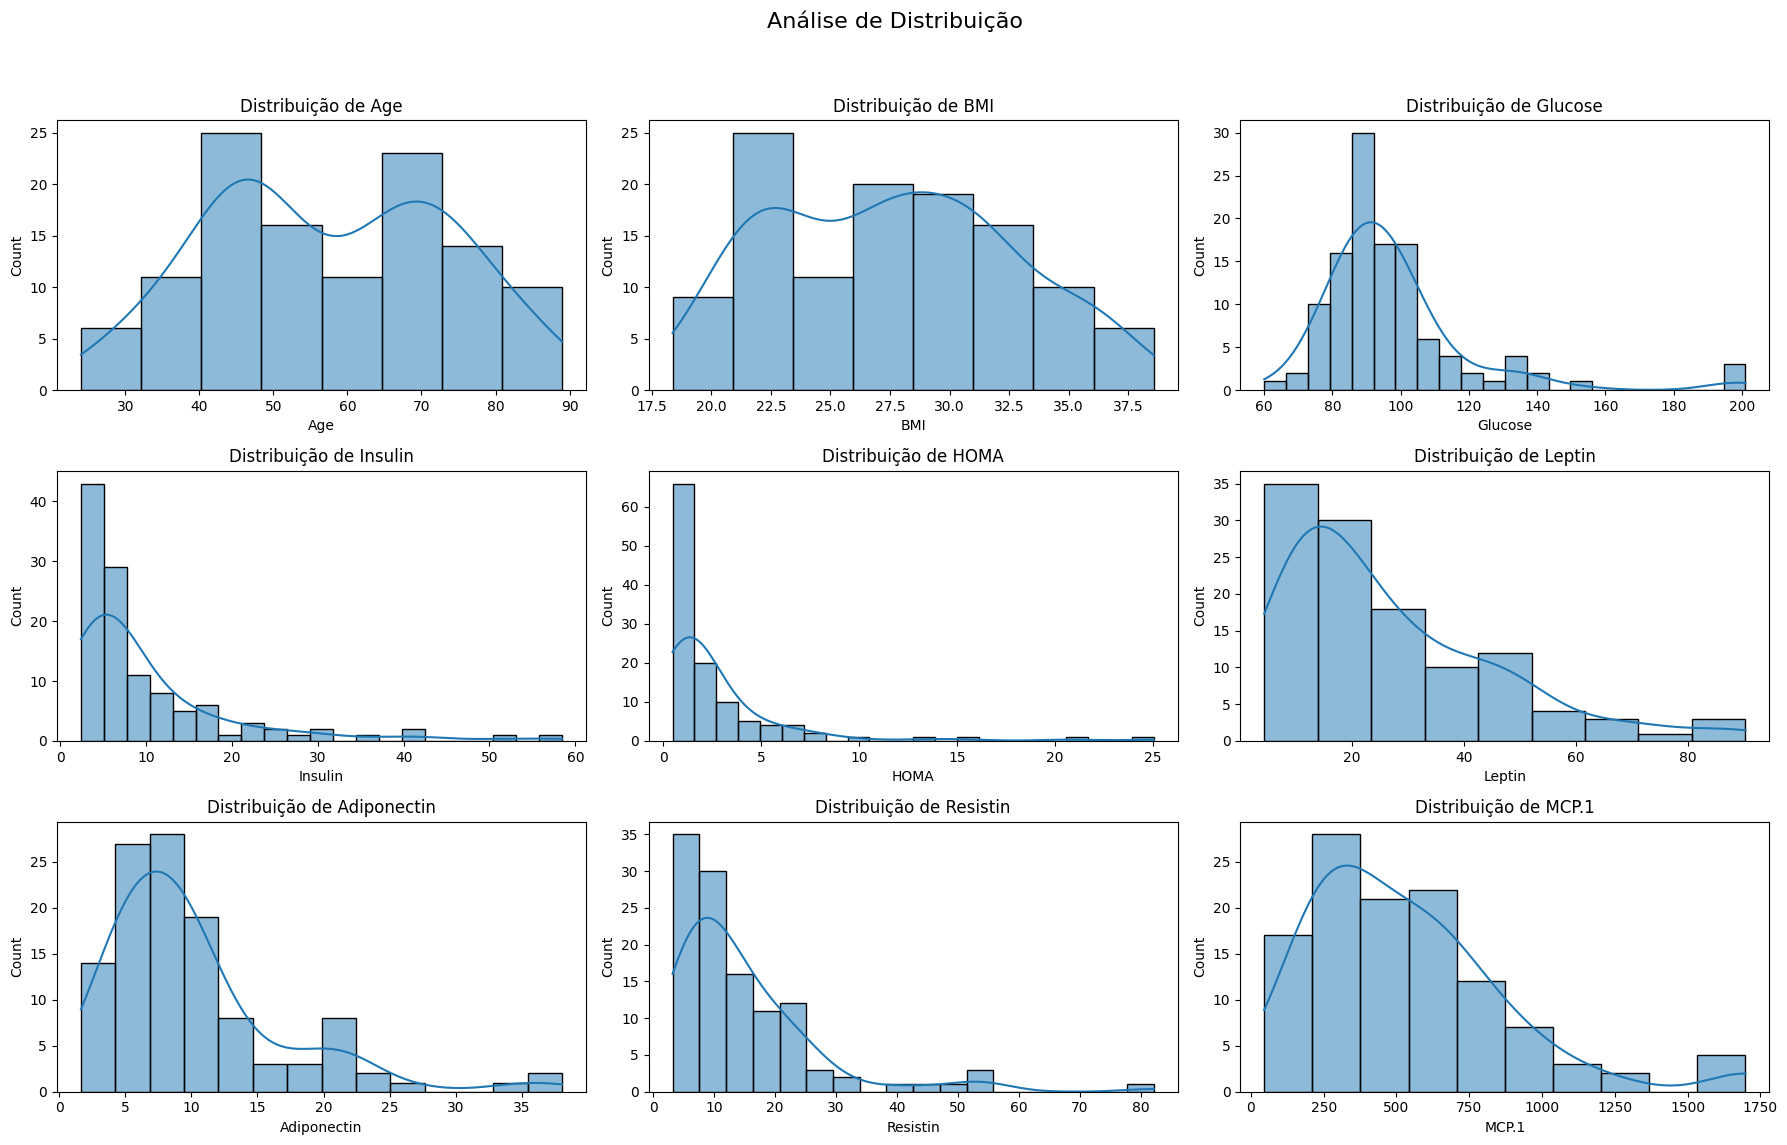

In [47]:
plt.figure(figsize=(18, 12))
plt.suptitle('Análise de Distribuição', fontsize=16)

# Histogramas para distribuição
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

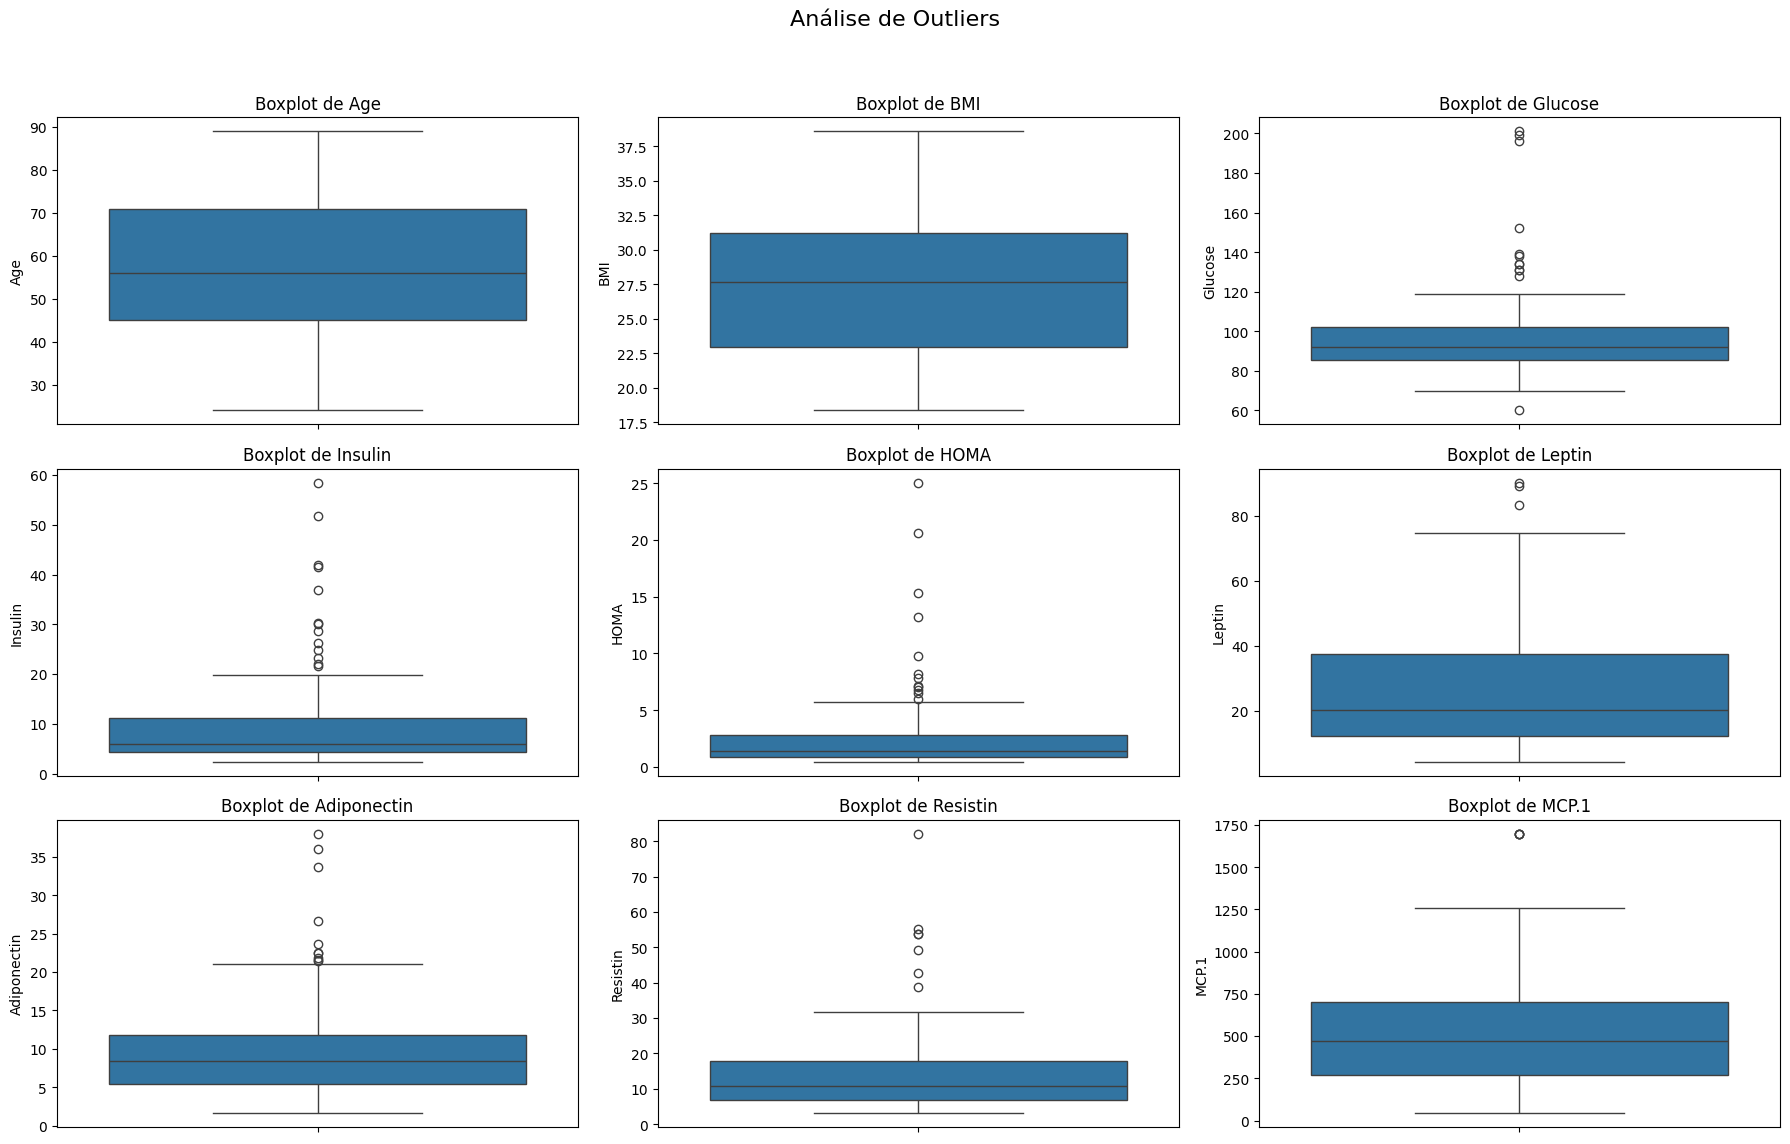

In [48]:
# Boxplots para Outliers
plt.figure(figsize=(18, 12))
plt.suptitle('Análise de Outliers', fontsize=16)
for i, col in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=X[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

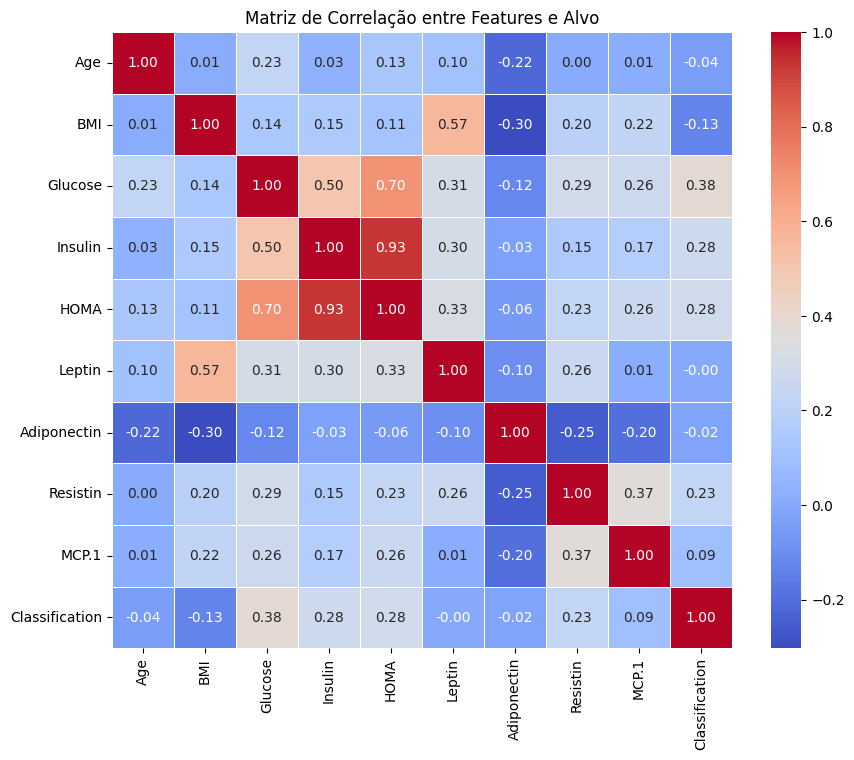

In [42]:
# Análise de Correlação
plt.figure(figsize=(10, 8))
data = pd.concat([X, y], axis=1)
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação entre Features e Alvo')
plt.show()

### Escalonamento de variáveis numéricas

In [ ]:
# StandardScaler (Padronização)
scaler_standard = StandardScaler()
X_standard = pd.DataFrame(scaler_standard.fit_transform(X), columns=X.columns)

In [51]:
# MinMaxScaler (Normalização)
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)

In [53]:
print("Comparação de Escalonamento")
print("StandardScaler:")
print(X_standard.head(3))
print("\nMinMaxScaler:")
print(X_minmax.head(3))

Comparação de Escalonamento
StandardScaler:
        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0 -0.579794 -0.816675 -1.239222 -0.728739 -0.614282 -0.932334    -0.070222   
1  1.601821 -1.378751 -0.258299 -0.688038 -0.548240 -0.930413    -0.697350   
2  1.539489 -0.891764 -0.302887 -0.550073 -0.464752 -0.454219     1.797998   

   Resistin     MCP.1  
0 -0.545517 -0.341251  
1 -0.864214 -0.191224  
2 -0.441660  0.058214  

MinMaxScaler:
        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0  0.369231  0.253850  0.070922  0.004908  0.000000  0.052299     0.221152   
1  0.907692  0.114826  0.226950  0.012190  0.009742  0.052726     0.103707   
2  0.892308  0.235278  0.219858  0.036874  0.022058  0.158526     0.571021   

   Resistin     MCP.1  
0  0.060665  0.224659  
1  0.010826  0.255926  
2  0.076906  0.307912  


In [54]:
print("Min/Max após StandardScaler:", float(np.min(X_standard)), float(np.max(X_standard)))

Min/Max após StandardScaler: -2.075757925759007 6.16476519655647


In [55]:
print("Min/Max após MinMaxScaler:", float(np.min(X_minmax)), float(np.max(X_minmax)))

Min/Max após MinMaxScaler: 0.0 1.0000000000000002


In [63]:
# Usando o StandardScaler para a modelagem
X_scaled = X_standard

# Divisão dos dados em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y.values.ravel(), 
    test_size=0.3, 
    random_state=42, 
    stratify=y 
)

print(f"Dados Divididos. X_train: {X_train.shape}, X_test: {X_test.shape}")

Dados Divididos. X_train: (81, 9), X_test: (35, 9)


### Balanceamento dos dados 

In [64]:
# SEM Balanceamento (Baseline)

print("Linha de Base (SEM Balanceamento)")
print("Distribuição no Treino (Desbalanceada):\n", pd.Series(y_train).value_counts(normalize=True))

model_unbalanced = LogisticRegression(random_state=42, max_iter=1000)
model_unbalanced.fit(X_train, y_train)
y_pred_unbalanced = model_unbalanced.predict(X_test)

print("\nRelatório de Classificação SEM Balanceamento:")
print(classification_report(y_test, y_pred_unbalanced, zero_division=0))

Linha de Base (SEM Balanceamento)
Distribuição no Treino (Desbalanceada):
 2    0.555556
1    0.444444
Name: proportion, dtype: float64

Relatório de Classificação SEM Balanceamento:
              precision    recall  f1-score   support

           1       0.74      0.88      0.80        16
           2       0.88      0.74      0.80        19

    accuracy                           0.80        35
   macro avg       0.81      0.81      0.80        35
weighted avg       0.81      0.80      0.80        35



In [66]:
# Balanceamento com SMOTE (Oversampling)

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("\nResultados COM Balanceamento (SMOTE)")
print("Distribuição após SMOTE:\n", pd.Series(y_smote).value_counts(normalize=True))

model_smote = LogisticRegression(random_state=42, max_iter=1000)
model_smote.fit(X_smote, y_smote)
y_pred_smote = model_smote.predict(X_test)

print("Relatório de Classificação COM SMOTE:")
print(classification_report(y_test, y_pred_smote, zero_division=0))


Resultados COM Balanceamento (SMOTE)
Distribuição após SMOTE:
 1    0.5
2    0.5
Name: proportion, dtype: float64
Relatório de Classificação COM SMOTE:
              precision    recall  f1-score   support

           1       0.64      0.88      0.74        16
           2       0.85      0.58      0.69        19

    accuracy                           0.71        35
   macro avg       0.74      0.73      0.71        35
weighted avg       0.75      0.71      0.71        35



In [67]:
# Balanceamento com Tomek Links (Undersampling)

tl = TomekLinks(sampling_strategy='majority')
X_tomek, y_tomek = tl.fit_resample(X_train, y_train)

print("\nResultados COM Balanceamento (Tomek Links)")
print("Distribuição após Tomek Links:\n", pd.Series(y_tomek).value_counts(normalize=True))

model_tomek = LogisticRegression(random_state=42, max_iter=1000)
model_tomek.fit(X_tomek, y_tomek)
y_pred_tomek = model_tomek.predict(X_test)

print("Relatório de Classificação COM Tomek Links:")
print(classification_report(y_test, y_pred_tomek, zero_division=0))


Resultados COM Balanceamento (Tomek Links)
Distribuição após Tomek Links:
 2    0.526316
1    0.473684
Name: proportion, dtype: float64
Relatório de Classificação COM Tomek Links:
              precision    recall  f1-score   support

           1       0.67      0.88      0.76        16
           2       0.86      0.63      0.73        19

    accuracy                           0.74        35
   macro avg       0.76      0.75      0.74        35
weighted avg       0.77      0.74      0.74        35



### Determinando as features mais relevantes (Feature Selection)

Importância das Features (Regressão Logística)
       Feature  Coeficiente  Importância Absoluta
2      Glucose     1.606326              1.606326
7     Resistin     0.629665              0.629665
1          BMI    -0.614578              0.614578
3      Insulin     0.410242              0.410242
4         HOMA     0.345166              0.345166
0          Age    -0.301824              0.301824
5       Leptin    -0.195685              0.195685
8        MCP.1     0.181409              0.181409
6  Adiponectin    -0.038335              0.038335


C:\Users\Thayanne\AppData\Local\Temp\ipykernel_33204\141294234.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância Absoluta', y='Feature', data=coef_df, palette='viridis')


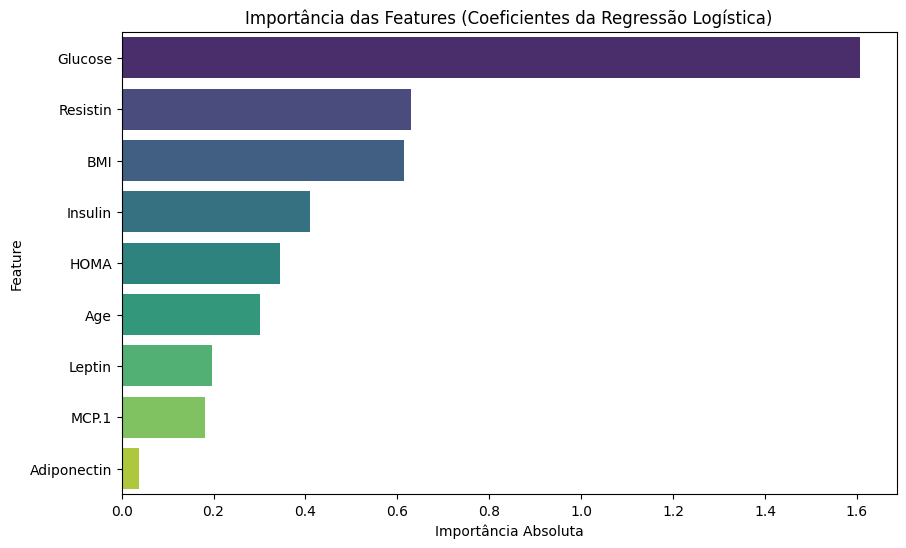

In [69]:
# Regressão Logística (Análise de Coeficientes)

log_reg_model = LogisticRegression(random_state=42, max_iter=1000)
log_reg_model.fit(X_scaled, y.values.ravel())

coef_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Coeficiente': log_reg_model.coef_[0],
    'Importância Absoluta': np.abs(log_reg_model.coef_[0])
}).sort_values(by='Importância Absoluta', ascending=False)

print("Importância das Features (Regressão Logística)")
print(coef_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância Absoluta', y='Feature', data=coef_df, palette='viridis')
plt.title('Importância das Features (Coeficientes da Regressão Logística)')
plt.show()

Importância das Features (Random Forest)
       Feature  Importância RF
2      Glucose        0.209528
7     Resistin        0.130120
1          BMI        0.128090
4         HOMA        0.120612
0          Age        0.115963
3      Insulin        0.090005
5       Leptin        0.079969
6  Adiponectin        0.071205
8        MCP.1        0.054507


C:\Users\Thayanne\AppData\Local\Temp\ipykernel_33204\99916235.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância RF', y='Feature', data=importance_rf_df, palette='magma')


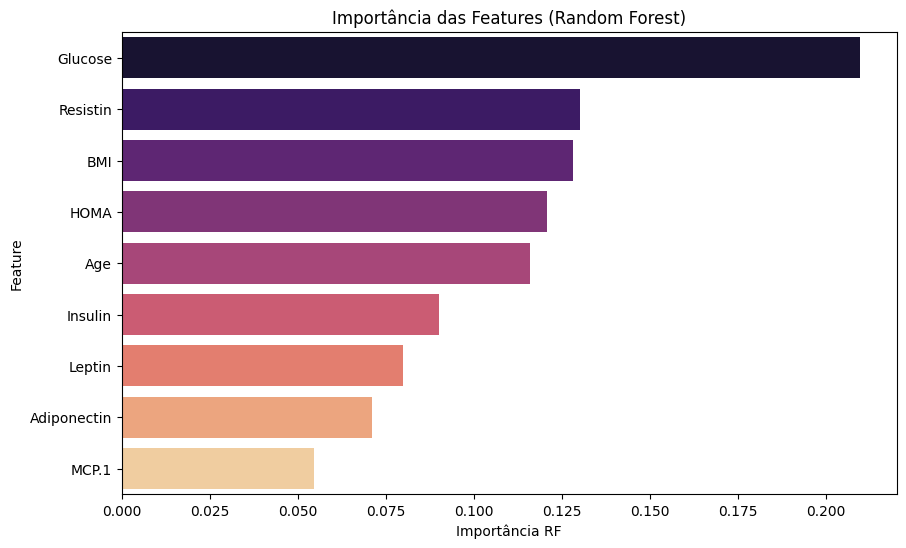

In [70]:
# Importância da Árvore (Random Forest Classifier)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, y.values.ravel())

feature_importances = pd.Series(rf_model.feature_importances_, index=X_scaled.columns)
importance_rf_df = pd.DataFrame({
    'Feature': feature_importances.index,
    'Importância RF': feature_importances.values
}).sort_values(by='Importância RF', ascending=False)

print("Importância das Features (Random Forest)")
print(importance_rf_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância RF', y='Feature', data=importance_rf_df, palette='magma')
plt.title('Importância das Features (Random Forest)')
plt.show()

In [71]:
# Análise de Variância / Desvio-Padrão

print("Variância e Desvio-Padrão das Features")
variance_std_df = pd.DataFrame({
    'Variância': X.var(),
    'Desvio-Padrão': X.std()
}).sort_values(by='Variância', ascending=False)

print(variance_std_df)

Variância e Desvio-Padrão das Features
                 Variância  Desvio-Padrão
MCP.1        119655.570601     345.912663
Glucose         507.382909      22.525162
Leptin          367.998771      19.183294
Age             259.621214      16.112766
Resistin        153.528100      12.390646
Insulin         101.359945      10.067768
Adiponectin      46.831322       6.843341
BMI              25.201763       5.020136
HOMA             13.264479       3.642043


In [73]:
# Escolhendo o Conjunto Final de Features

# Seleção das top 5 features que demonstraram maior impacto em ambos os modelos.
selected_features = [
    'Resistin', 
    'BMI', 
    'HOMA', 
    'Glucose', 
    'Insulin' 
]

# Criando o conjunto final de features escalonadas
X_final_scaled = X_scaled[selected_features]

print(f"Conjunto Final de Features Escolhidas para Modelagem: {selected_features}")
print("Shape do Conjunto Final:", X_final_scaled.shape)

Conjunto Final de Features Escolhidas para Modelagem: ['Resistin', 'BMI', 'HOMA', 'Glucose', 'Insulin']
Shape do Conjunto Final: (116, 5)
